In [1]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [16]:
def visualize_graph(G,color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G,pos=nx.spring_layout(G,seed=42),with_labels=False,node_color = color,cmap = 'Set2')
    plt.show()
    
def visualize_embedding(h,color , epoch = None ,loss = None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:,0],h[:,1],s=140,c = color,cmap = 'Set2')
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch:{epoch},Loss:{loss.item():.4f}',fontsize=16)
    plt.show()

In [3]:
from torch_geometric.datasets import KarateClub
dataset = KarateClub()
print(f'Dataset:{dataset}')
print('=======================')
print(f'Number of graphs:{len(dataset)}')
print(f'Number of feature:{dataset.num_features}')
print(f'Number of classes:{dataset.num_classes}')

Dataset:KarateClub()
Number of graphs:1
Number of feature:34
Number of classes:4


In [4]:
data = dataset[0]
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


x=[34,34]:34个样本，每个样本特征为34维
edge_index=[2,156]:2:source,target;156:156条边
y=[34]:34个标签
train_mask=[34]:哪些点有标签

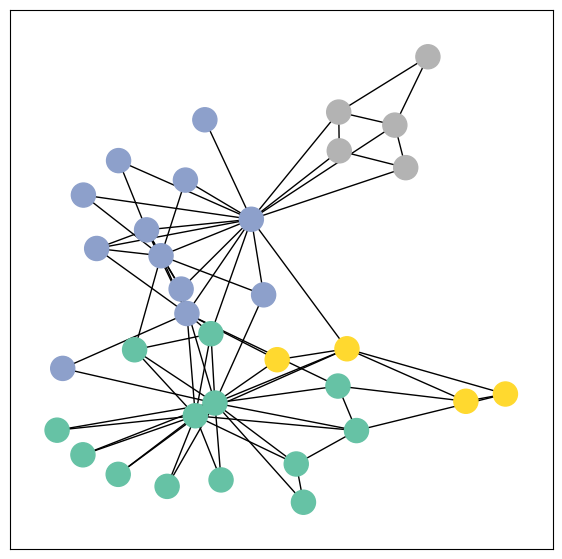

In [5]:
from torch_geometric.utils import to_networkx
    
G = to_networkx(data,to_undirected=True)
visualize_graph(G,color = data.y)

In [6]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features,4)
        self.conv2 = GCNConv(4,4)
        self.conv3 = GCNConv(4,2)
        self.classifier = Linear(2,dataset.num_classes)
    
    def forward(self,x,edge_index):
        h = self.conv1(x,edge_index)
        h = h.tanh()
        h = self.conv2(h,edge_index)
        h = h.tanh()
        h = self.conv3(h,edge_index)
        h= h.tanh()
        out = self.classifier(h)
        return out,h
     
model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


tensor([[-0.1800,  0.6862,  0.1598,  0.1413],
        [-0.1946,  0.6587,  0.1327,  0.1069],
        [-0.1860,  0.6638,  0.1398,  0.1144],
        [-0.1890,  0.6638,  0.1388,  0.1139],
        [-0.1999,  0.6750,  0.1442,  0.1249],
        [-0.1905,  0.6825,  0.1533,  0.1351],
        [-0.1895,  0.6814,  0.1528,  0.1341],
        [-0.1931,  0.6610,  0.1351,  0.1099],
        [-0.1940,  0.6523,  0.1278,  0.0997],
        [-0.1952,  0.6484,  0.1243,  0.0950],
        [-0.1975,  0.6764,  0.1460,  0.1269],
        [-0.1836,  0.6835,  0.1564,  0.1375],
        [-0.1935,  0.6638,  0.1372,  0.1130],
        [-0.1913,  0.6574,  0.1328,  0.1060],
        [-0.2014,  0.6454,  0.1198,  0.0904],
        [-0.1991,  0.6445,  0.1198,  0.0898],
        [-0.1890,  0.6801,  0.1518,  0.1326],
        [-0.2028,  0.6605,  0.1315,  0.1076],
        [-0.1974,  0.6422,  0.1186,  0.0874],
        [-0.1994,  0.6531,  0.1267,  0.0997],
        [-0.1955,  0.6516,  0.1268,  0.0986],
        [-0.2052,  0.6534,  0.1250

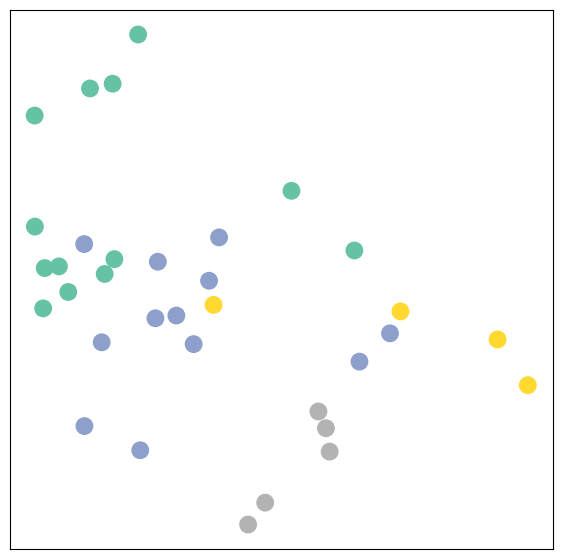

In [7]:
output,h = model(data.x,data.edge_index)
print(output)
print(f'Embedding shape:{list(h.shape)}')
visualize_embedding(h,color=data.y)

epoch=10/100 
Loss=1.3641955852508545


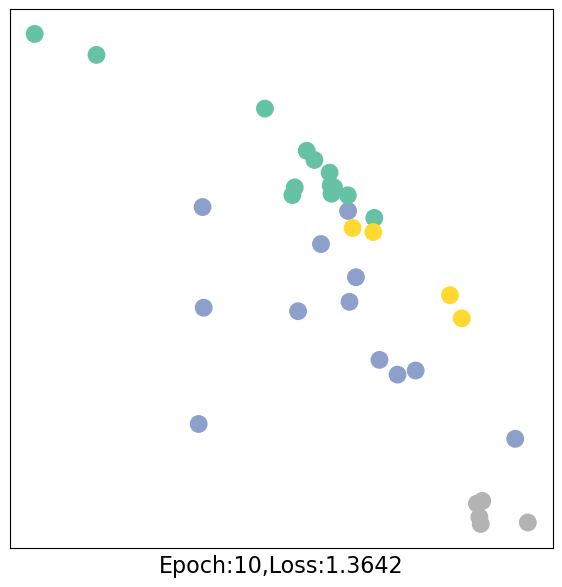

epoch=20/100 
Loss=1.2245826721191406


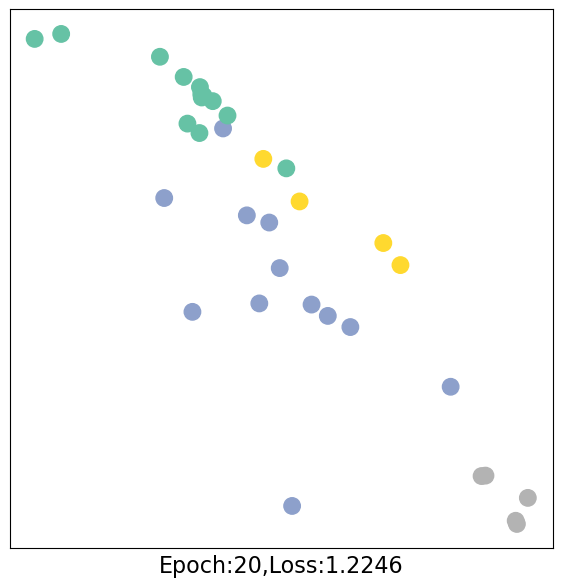

epoch=30/100 
Loss=1.0082556009292603


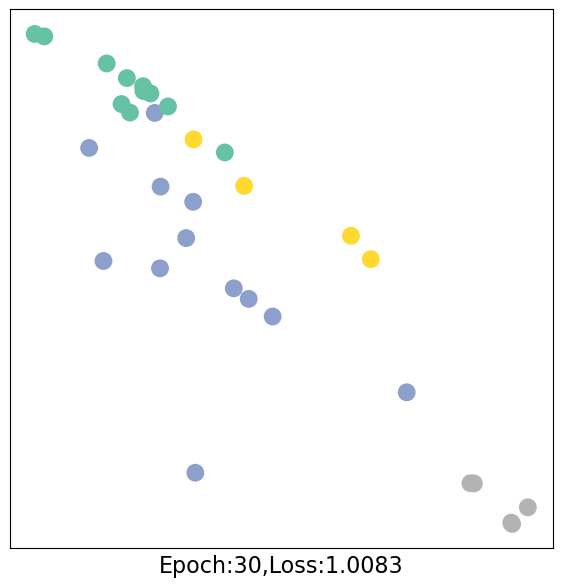

epoch=40/100 
Loss=0.7806470990180969


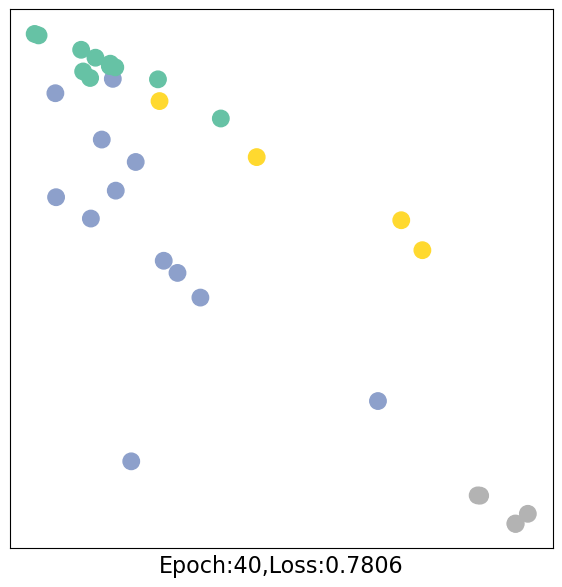

epoch=50/100 
Loss=0.5809406042098999


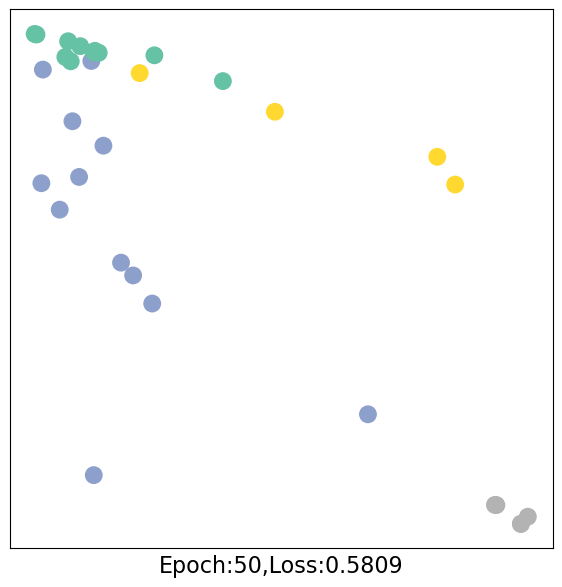

epoch=60/100 
Loss=0.4283532202243805


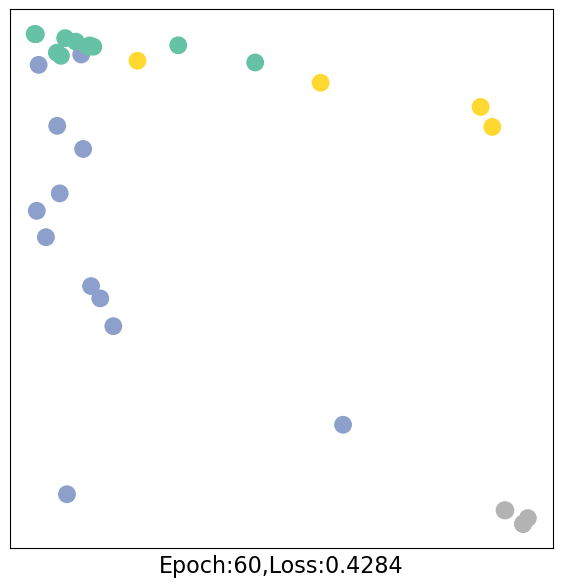

epoch=70/100 
Loss=0.326759397983551


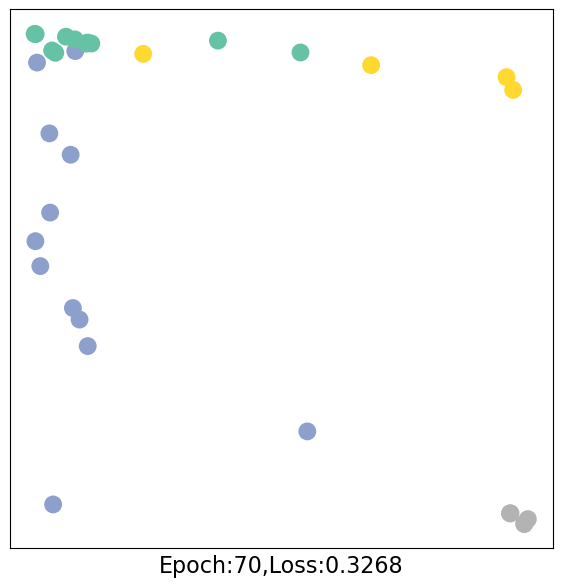

epoch=80/100 
Loss=0.26013848185539246


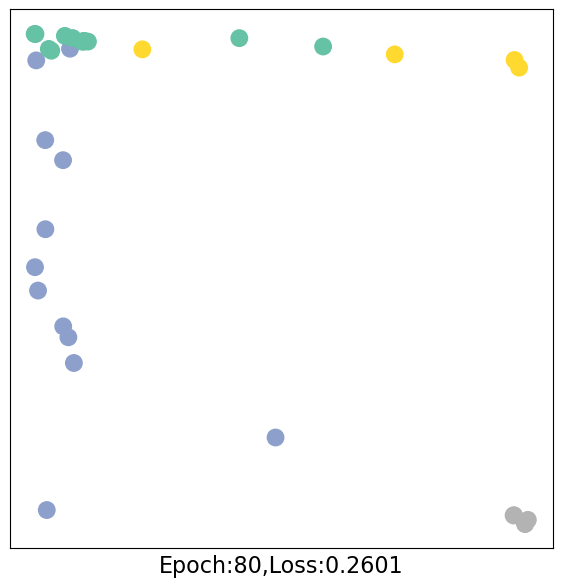

epoch=90/100 
Loss=0.21477451920509338


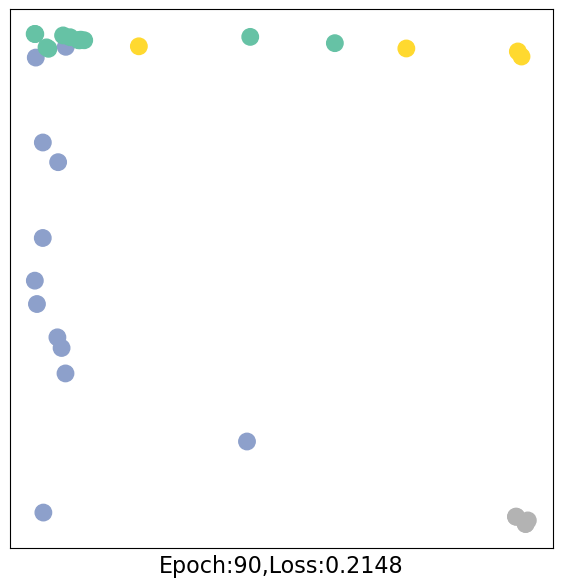

epoch=100/100 
Loss=0.1822681725025177


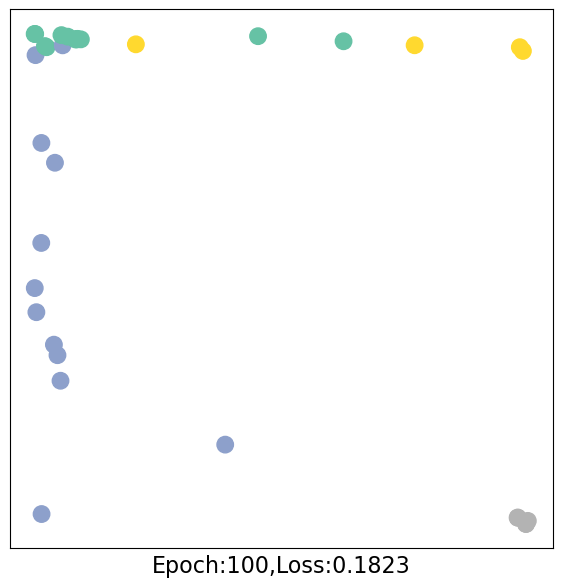

In [21]:
import time 
epochs  = 100
model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)


def train(data):
    optimizer.zero_grad()
    out,h = model(data.x,data.edge_index)
    loss = criterion(out[data.train_mask],data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss,h


for epoch in range(1,epochs+1):
    loss , h = train(data)
    if  epoch % 10 == 0: 
        print("epoch={}/{} \nLoss={}".format(epoch,epochs,loss))
        visualize_embedding(h,color=data.y,epoch = epoch,loss = loss)
        time.sleep(0.5)
        

In [22]:
data.train_mask

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])